# 3D complex inversion from 2D lines
Carbonate precipitation is a process that can be used to consolidate soils. The precipitation of carbonate in the ground can be followed using geophysical methods. Induced polarisation (IP) has proven useful for this. In this dataset, the 3D distribution of carbonate precipitation is inferred from field time-domain IP data. See [Saneiyan et al. (2019)](https://doi.org/10.1016/j.ecoleng.2018.11.010) for more details.

In [1]:
 # trick to import a resipy from a local copy (you won't need that if you `pip install resipy`)
import sys 
sys.path.append('/Volumes/Other/ForGitMac/resipy/src')

from resipy import Project
import numpy as np
import matplotlib.pyplot as plt
import pyvista as pv

datadir = '/Volumes/Other/ForGitMac/resipy/src/examples/ip-3d/3D_from_2D_lines'

/Users/Sina/opt/anaconda3/lib/python3.7/site-packages/pyvista/core/pyvista_ndarray.py:2: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3,and in 3.9 it will stop working
  from collections import Iterable


API path =  /Volumes/Other/ForGitMac/resipy/src/resipy
ResIPy version =  3.2.3
cR2.exe found and up to date.
R3t.exe found and up to date.
cR3t.exe found and up to date.


In [2]:
k = Project(typ='cR3t')
k.create3DSurvey(datadir, lineSpacing=2, zigzag=False, 
                 name='MICP_mergedSurvey', ftype='Syscal')

Working directory is: /Volumes/Other/ForGitMac/resipy/src/resipy
clearing dirname
Survey.filterDefault: Number of Inf or NaN : 57

filterData: 57 / 2670 quadrupoles removed.
Survey.filterDefault: 111 duplicates removed.

Survey.filterDefault: 79 measurements with A or B == M or N

filterData: 79 / 2502 quadrupoles removed.


/Volumes/Other/ForGitMac/resipy/src/resipy/Survey.py:1534: RuntimeWarning: divide by zero encountered in true_divide
  K = 2*np.pi/((1/AM)-(1/BM)-(1/AN)+(1/BN)) # geometric factor


2170/2423 reciprocal measurements found.
317 measurements error > 20 %
2170/2423 reciprocal measurements found.
317 measurements error > 20 %
Survey.filterDefault: Number of Inf or NaN : 23

filterData: 23 / 2670 quadrupoles removed.
Survey.filterDefault: 112 duplicates removed.

Survey.filterDefault: 80 measurements with A or B == M or N

filterData: 80 / 2535 quadrupoles removed.
2232/2455 reciprocal measurements found.
273 measurements error > 20 %
2232/2455 reciprocal measurements found.
273 measurements error > 20 %
Survey.filterDefault: Number of Inf or NaN : 16

filterData: 16 / 2670 quadrupoles removed.
Survey.filterDefault: 112 duplicates removed.

Survey.filterDefault: 82 measurements with A or B == M or N

filterData: 82 / 2542 quadrupoles removed.
2244/2460 reciprocal measurements found.
308 measurements error > 20 %
2244/2460 reciprocal measurements found.
308 measurements error > 20 %


Creating tetrahedral mesh...fmd in gmshWrap.py: 9.000000
writing .geo to file completed, save location:
/Volumes/Other/ForGitMac/resipy/src/resipy/invdir

Reading mesh3d.msh
Gmsh version == 3.x
reading node coordinates...
Determining element type...Tetrahedra
Reading connection matrix...
ignoring 5140 elements in the mesh file, as they are not required for R2/R3t
Finished reading .msh file
interpolating topography onto mesh using triangulate interpolation...done
Done
ResIPy Estimated RAM usage = 0.490484 Gb
done


/Users/Sina/opt/anaconda3/lib/python3.7/site-packages/vtk/util/numpy_support.py:65: DeprecationWarning: Converting `np.character` to a dtype is deprecated. The current result is `np.dtype(np.str_)` which is not strictly correct. Note that `np.character` is generally deprecated and 'S1' should be used.
  if numpy_array_type == key or \
/Users/Sina/opt/anaconda3/lib/python3.7/site-packages/vtk/util/numpy_support.py:67: DeprecationWarning: Converting `np.character` to a dtype is deprecated. The current result is `np.dtype(np.str_)` which is not strictly correct. Note that `np.character` is generally deprecated and 'S1' should be used.
  numpy_array_type == numpy.dtype(key):


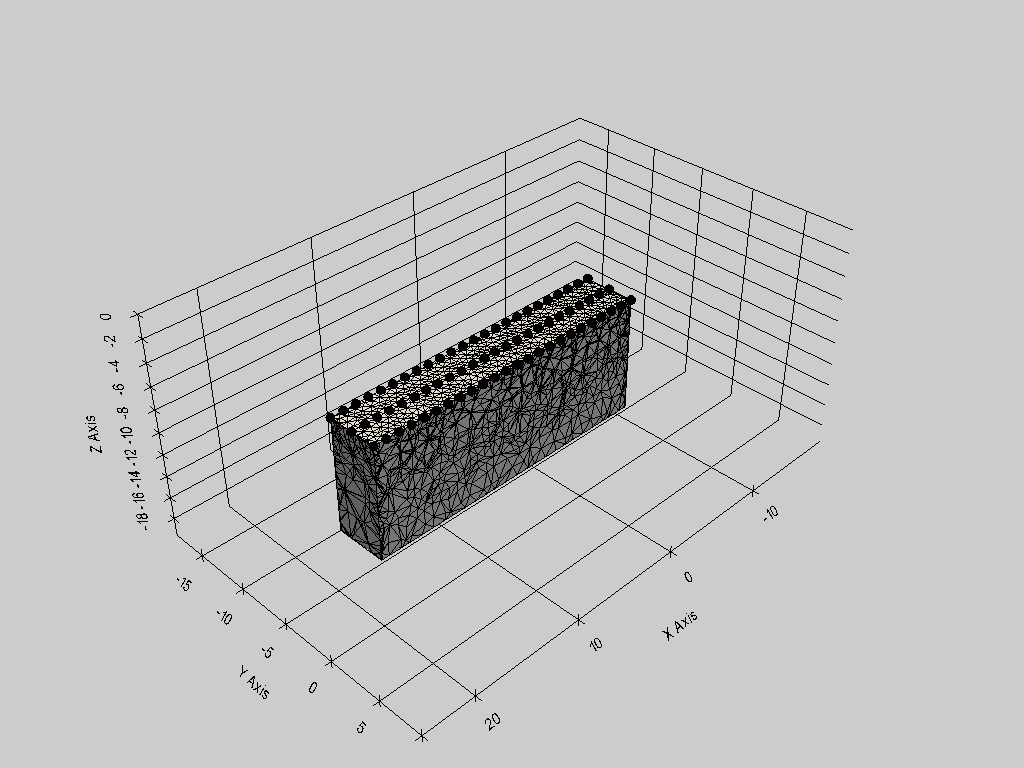

In [3]:
k.createMesh(cl_factor=4, fmd=9)
k.showMesh()

# Filtering process per Saneiyan et al. (2019)

In [4]:
k.filterRecip(percent=20)
k.filterNested()
k.filterRangeIP(phimin=0, phimax=25)

898 measurements with greater than 20.0% reciprocal error removed!


Error model is R_err = 0.003*R_avg + 3.98e-04 (R^2 = 0.994)
Error model is: Sp(m) = 1.280*R^-0.314 (R^2 = 0.728)


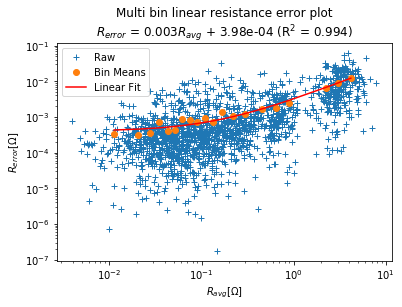

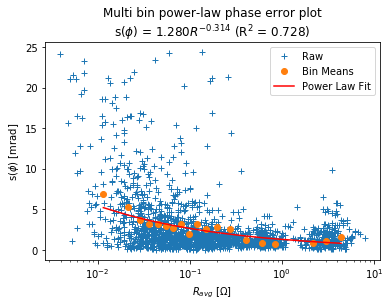

In [5]:
k.err = True
k.fitErrorLin()
k.fitErrorPwlIP()

In [6]:
k.param['min_error'] = 0.05
k.invert()

Writing .in file and protocol.dat... 

/Volumes/Other/ForGitMac/resipy/src/resipy/Project.py:2913: RuntimeWarning: divide by zero encountered in log10
  np.log10(np.sin(-phase/1000)/np.log10(r))] #log10(imaginary conductivity)


done!

--------------------- MAIN INVERSION ------------------


 >> c R 3 t     C o m p l e x   R e s i s t i v i t y    M o d e l    v1.1 <<

 >> Date: 17-02-2021
 >> My beautiful 3D survey                                                          
 >> I n v e r s e   S o l u t i o n   S e l e c t e d <<
 >> A d v a n c e d   M e s h   I n p u t <<
 >> T e t r a h e d r a l   E l e m e n t   M e s h <<

 >> Reading mesh file 
 >> Determining storage needed for finite element conductance matrix
 >> Generating index array for finite element conductance matrix
 >> Reading resistivity model from res0.dat            
 >> N o r m a l   R e g u l a r i s a t i o n <<
 >> D a t a   w e i g h t s   t o   b e   r e a d   f r o m   d a t a   f i l e <<
 >> Memory estimates:
    For   1000 measurements the memory needed is:           0.25 Gb
    For   2000 measurements the memory needed is:           0.49 Gb
    For   5000 measurements the memory needed is:           1.21 Gb
    For  10000 measur

# Results for day 10
<b><i>Resistivity:</i></b><br>
Showing the geologic profile of IFRC site at Rifle, CO

<b><i>Phase:</i></b><br>
In addition to geologic profile, MICP impacted zone is clear by <b>high phase responce</b> (up to -6 mrads).

/Users/Sina/opt/anaconda3/lib/python3.7/site-packages/vtk/util/numpy_support.py:65: DeprecationWarning: Converting `np.character` to a dtype is deprecated. The current result is `np.dtype(np.str_)` which is not strictly correct. Note that `np.character` is generally deprecated and 'S1' should be used.
  if numpy_array_type == key or \
/Users/Sina/opt/anaconda3/lib/python3.7/site-packages/vtk/util/numpy_support.py:67: DeprecationWarning: Converting `np.character` to a dtype is deprecated. The current result is `np.dtype(np.str_)` which is not strictly correct. Note that `np.character` is generally deprecated and 'S1' should be used.
  numpy_array_type == numpy.dtype(key):


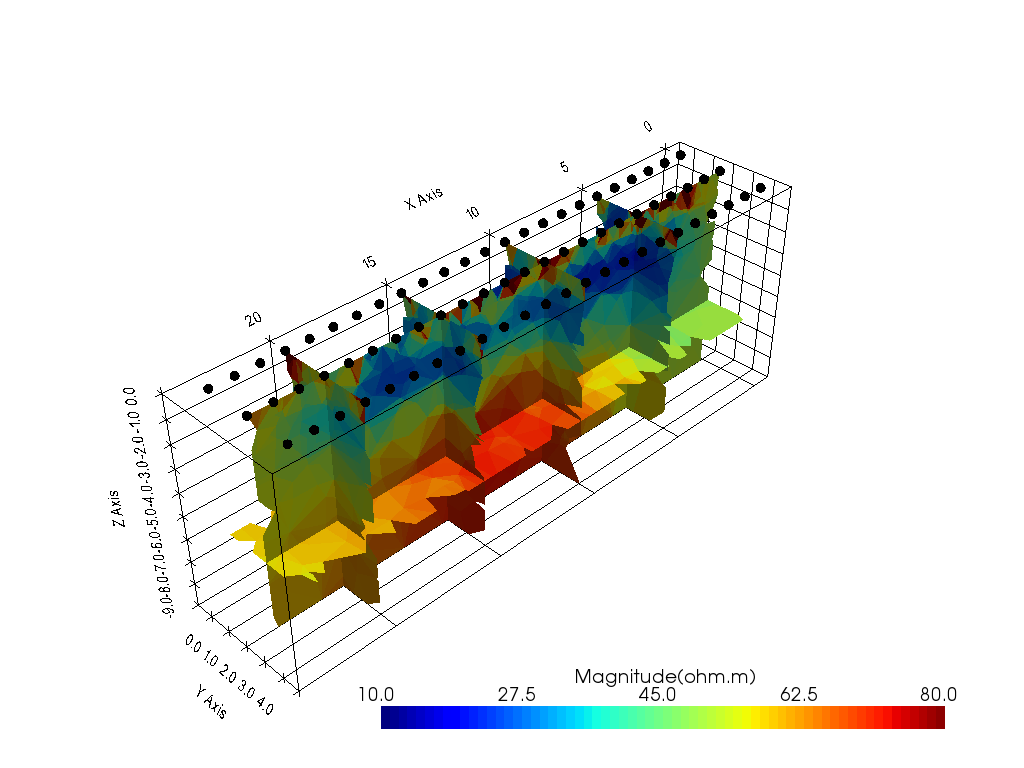

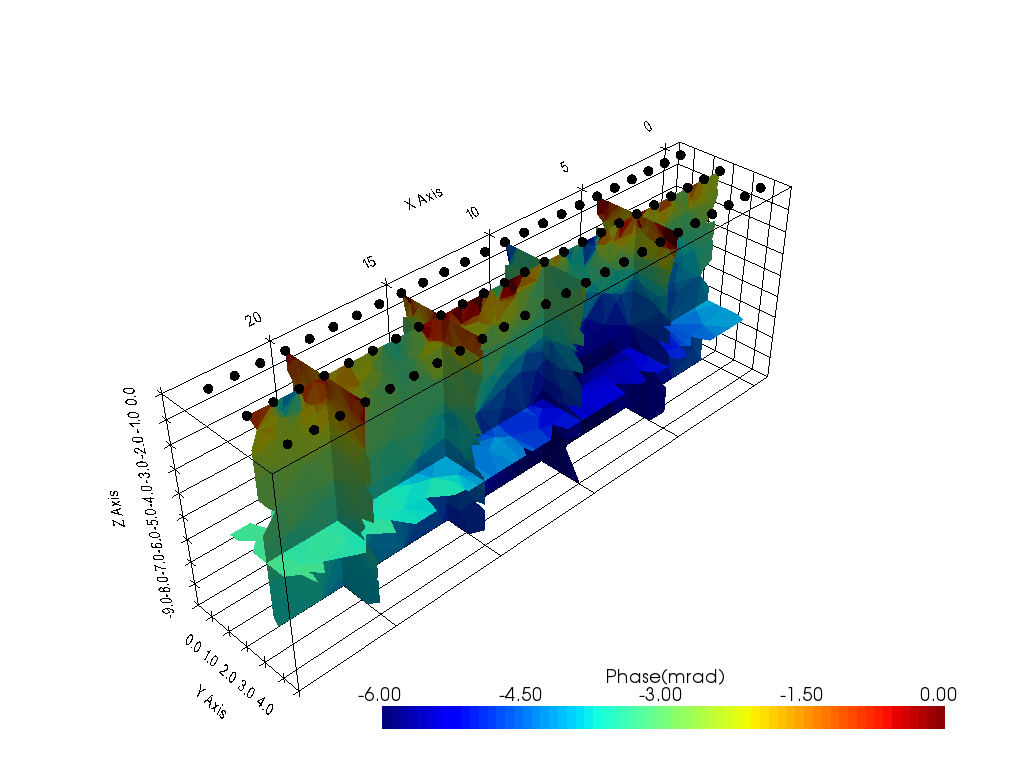

In [7]:
k.showResults(attr='Magnitude(ohm.m)', pvslices=[[5,10,15,20],[2],[-6]], vmin=10, vmax=80,
             background_color=(1,1,1), color_map='jet')
k.showResults(attr='Phase(mrad)', pvslices=[[5,10,15,20],[2],[-6]], vmin=-6, vmax=0,
             background_color=(1,1,1), color_map='jet')

# Phase responce to MICP process after 10 days
Phase -4.5 to -6 is the affected MICP zone - matching Saneiyan et al. (2019)

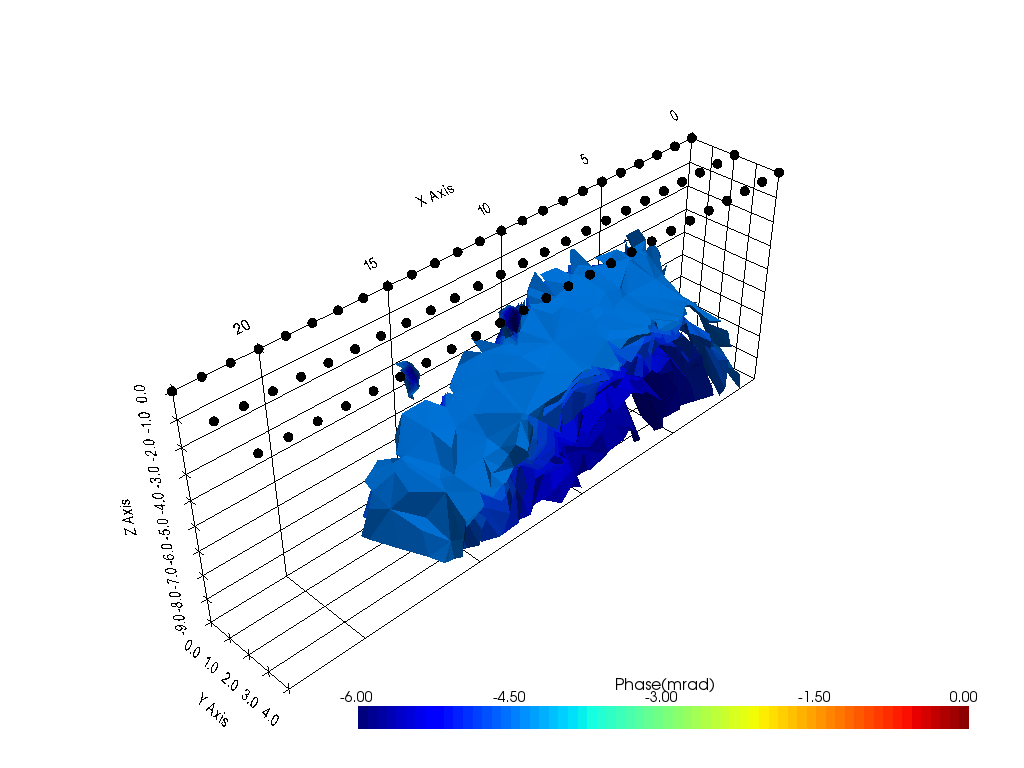

In [8]:
surfaces = list(np.linspace(-6,-4.5,10)) # from Phase -4.5 to -6 is the affected MICP zone - matching Saneiyan et al. (2019)
k.showResults(attr='Phase(mrad)', pvcontour=surfaces, vmin=-6, vmax=0,
             background_color=(1,1,1), color_map='jet')